In [1]:
import requests as rq
import json
import pandas as pd
import numpy as np
from textwrap import wrap
from matplotlib import pyplot as plt
from TCGA_files import *
#from ensembleAPI import geneinfo, genesinfo
from IPython.display import HTML
from sklearn import metrics
from hsbmpy import *

In [2]:
import importlib, hsbmpy
importlib.reload(hsbmpy)
from hsbmpy import *

## query many

In [288]:
level = 1
setup='highlyvariable_colonrectal'
#setup = 'oversigma_10tissue'
#label = 'disease_type'
label='primary_site'
#label = 'uniq'
L = 4
#labels = ['primary_site', 'disease_type', 'uniq']
#labels = ['primary_site', 'secondary_site']
labels=['RPPA Clusters']
directory = "results/hSBM/%s"%setup
#directory="gtex/hsbm/%s"%setup
df_clusters = pd.read_csv("%s/topsbm/topsbm_level_%d_clusters.csv"%(directory,L), header=[0])
df_clusters.head()

,Cluster 1,Cluster 2
0,00cc9b4d-a847-464e-979a-,ff8de5e6-76c5-491a-8fac-
1,bef7dd4d-624a-4b35-aab8-,73ce143e-44f1-49c6-963f-
2,31ce5f7c-5f1d-4e54-9343-,6525a459-76eb-4c64-b061-
3,c04b9aba-55bc-4ba9-b761-,665cc2e6-600b-4557-911a-
4,751f84dc-7c2d-417a-bc1f-,678d7cdd-0a63-41b2-9203-


In [289]:
#df_files = pd.read_csv("/Users/filippo/Developer/tesi/gtex/files.dat", index_col=[0], header=[0])
#df_files = pd.read_csv("/Users/filippo/Developer/tesi/results/counts/files.dat", index_col=[0], header=[0])
df_files = pd.read_csv("%s/files.dat"%directory, index_col=[0], header=[0])
#df_files.insert(2,'uniq', '')
#for sample in df_files.index.values:
#    row = df_files.loc[sample,:]
#    df_files.at[sample,'uniq']='%s[%s]'%(row['primary_site'],row['disease_type'])
df_files.head()

,primary_site,disease_type,case_id,RPPA Clusters
d2587070-cb7d-440d-ae49-52f5077248e6.htseq.counts.gz,Colon,Cystic_Mucinous_and_Serous_Neoplasms,NaN,Other
97675f21-ce94-4e7c-bc46-179cc2903bf3.htseq.counts.gz,Colon,Adenomas and Adenocarcinomas,NaN,CMS3
646d58e7-b7e2-4b2b-bb37-3ca20b601213.htseq.counts.gz,Colon,Adenomas and Adenocarcinomas,NaN,Other
0f2b58b4-7d91-48f3-8901-b624e3d6aa51.htseq.counts.gz,Colon,Adenomas and Adenocarcinomas,NaN,unknown
3eb03db7-efc1-4f20-bbc9-61551905eb9b.htseq.counts.gz,Colon,Adenomas and Adenocarcinomas,NaN,Other


In [306]:
normalise=True
level=2
cluster= get_cluster_given_l(level, directory)
fraction_sites = get_fraction_sites(cluster,df_files=df_files,label='RPPA Clusters', normalise=normalise)
#fraction_sites_shuffle = get_fraction_sites(cluster, pd.read_csv("%s/files.dat.shuf"%directory, index_col=[0]), normalise=normalise)
#clustersinfo_shuffle = get_clustersinfo(cluster, fraction_sites_shuffle)

In [307]:
fsdf = pd.DataFrame(data=fraction_sites)
fsdf = fsdf.drop('Other', axis=1)
fsdf = fsdf.divide(fsdf.sum(axis=1), axis=0).fillna(0)
fraction_sites = fsdf.sort_values(by=fsdf.columns.to_list(), ascending=True).to_dict(orient='list')

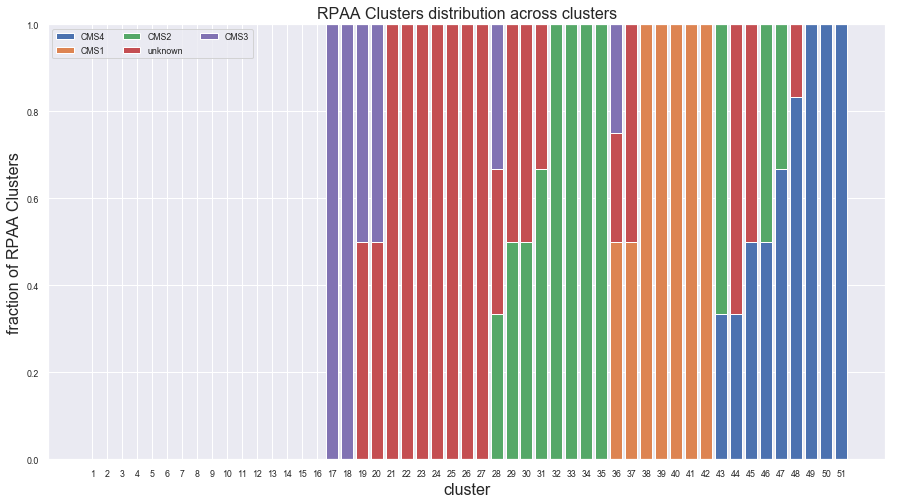

In [308]:
clustersinfo = get_clustersinfo(cluster,fraction_sites)
plot_cluster_composition(fraction_sites,directory,level,label='RPAA Clusters', normalise=normalise)

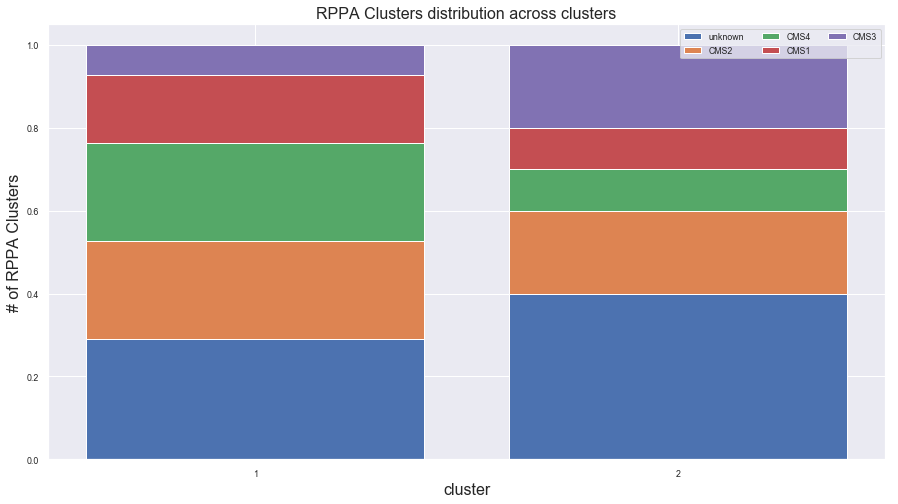

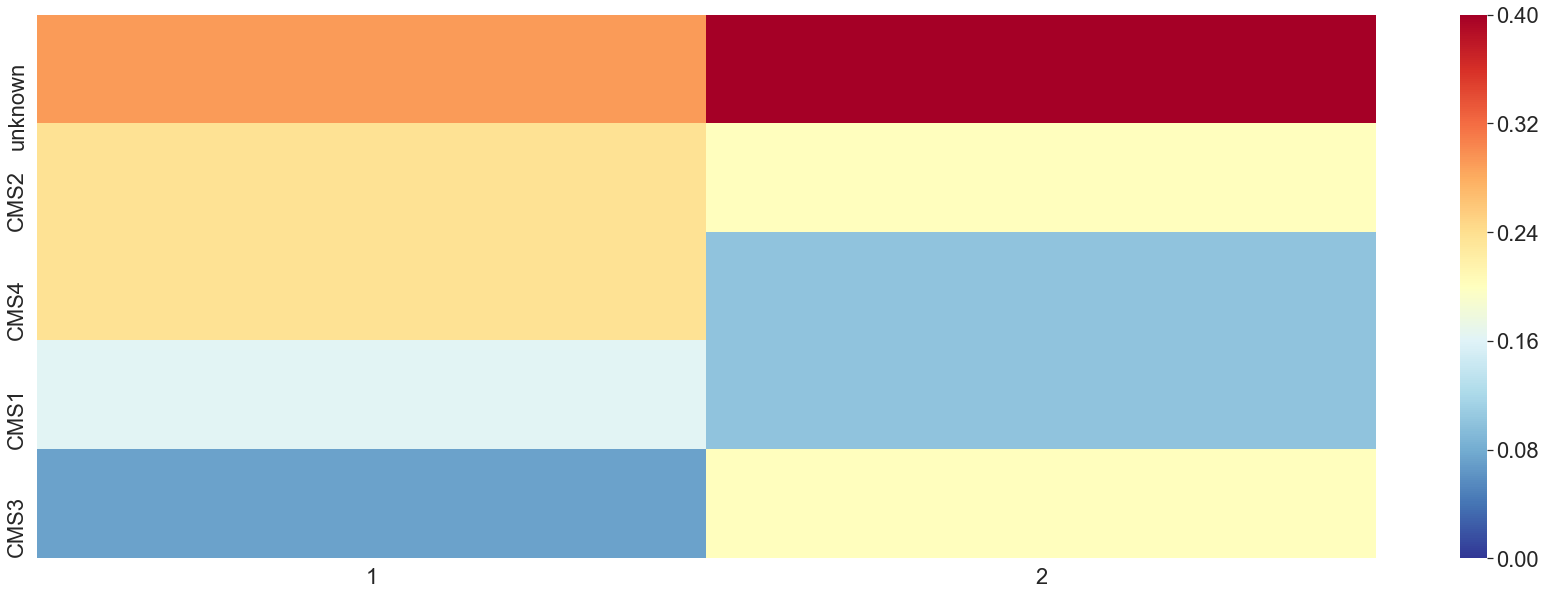

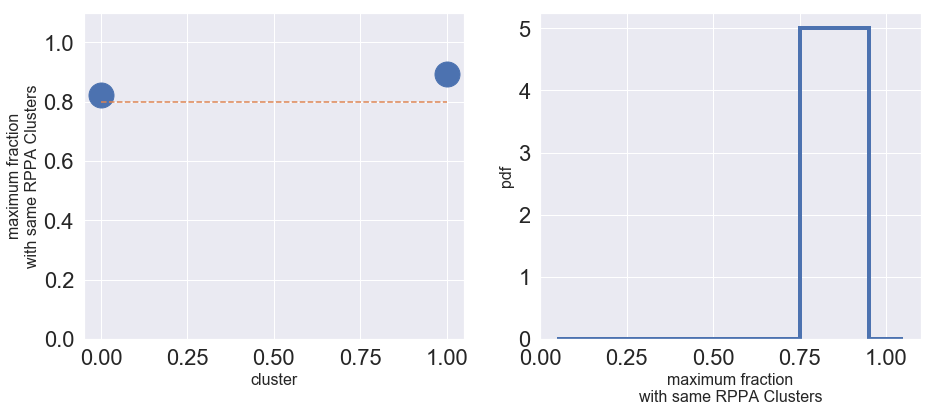

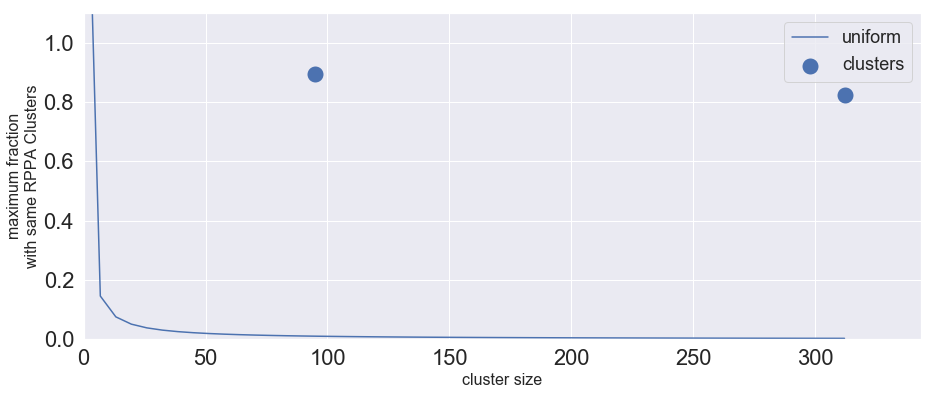

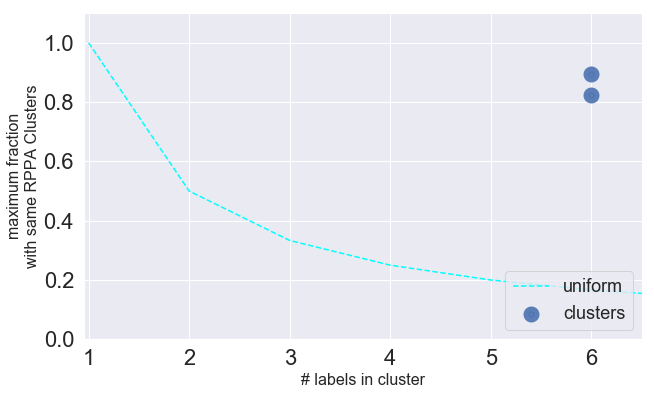

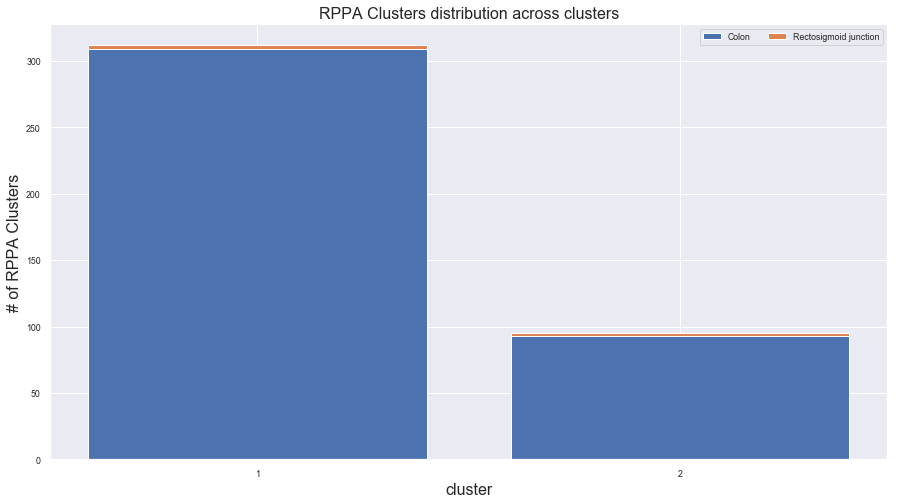

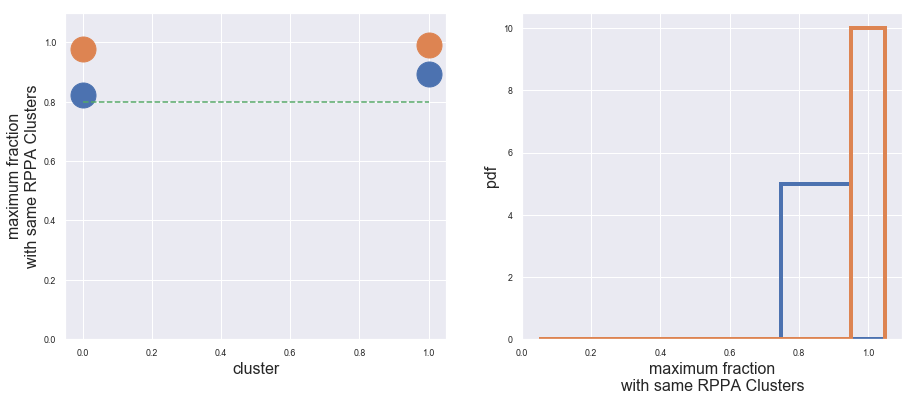

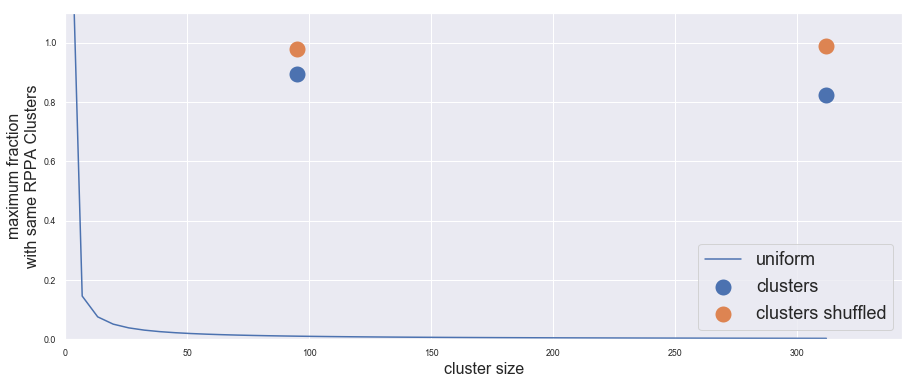

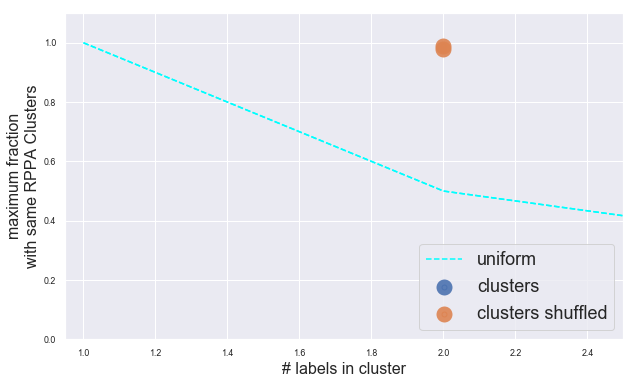

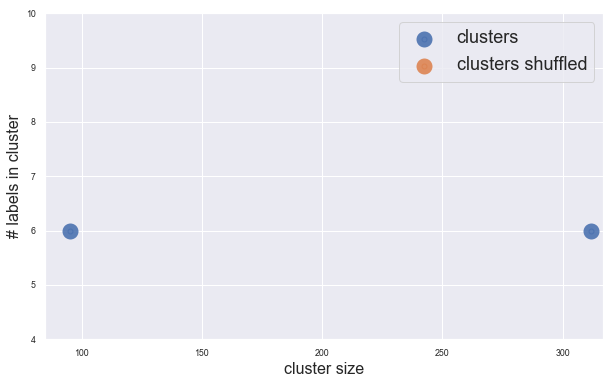

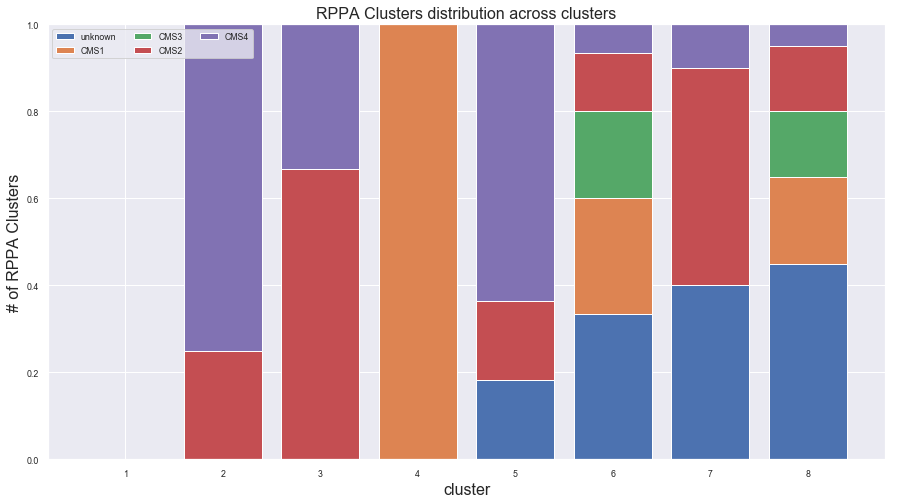

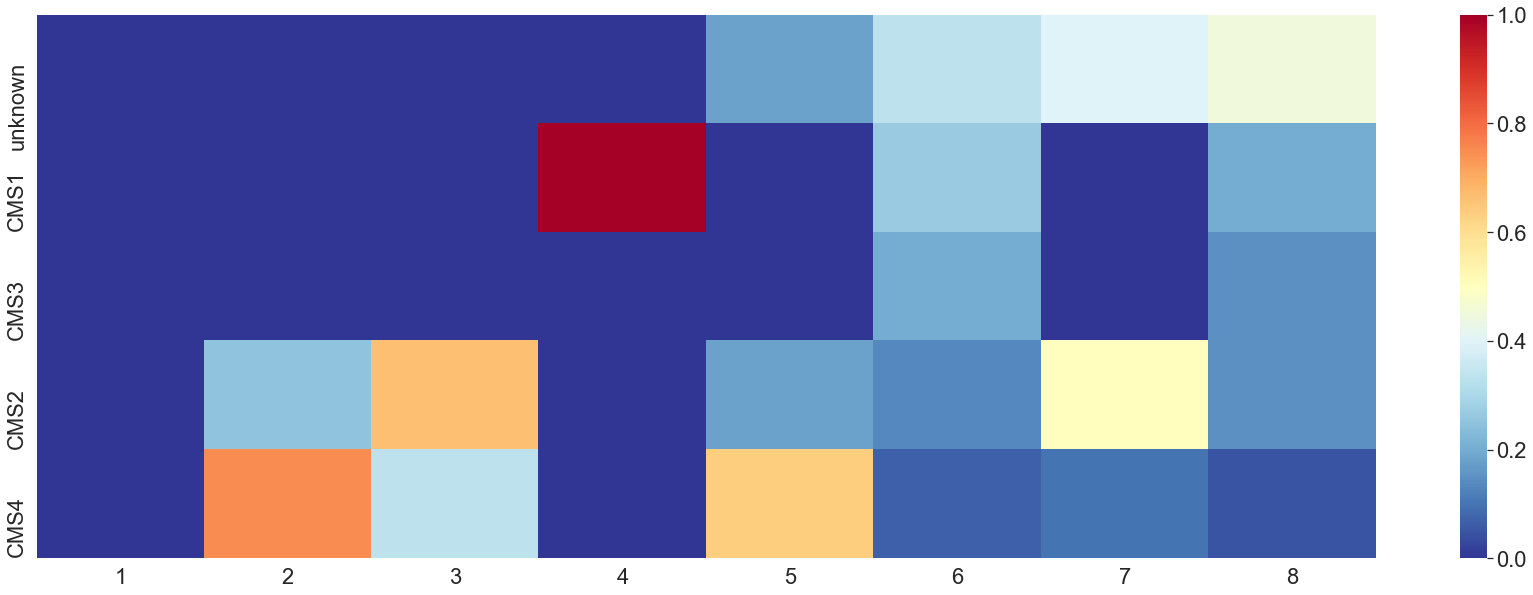

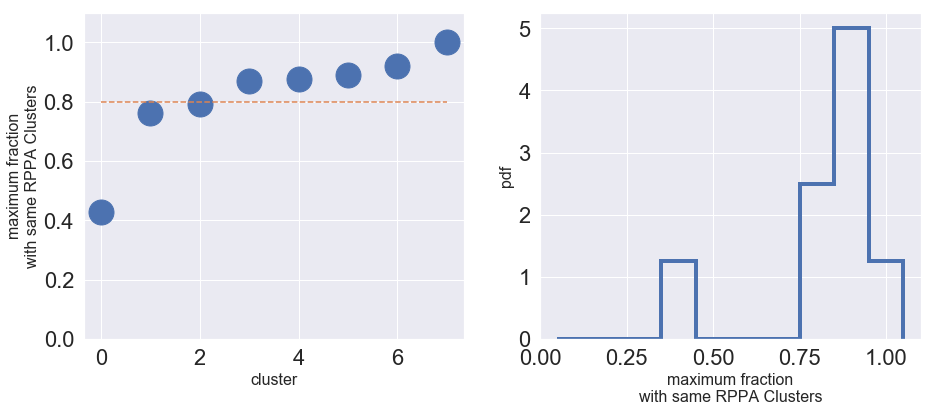

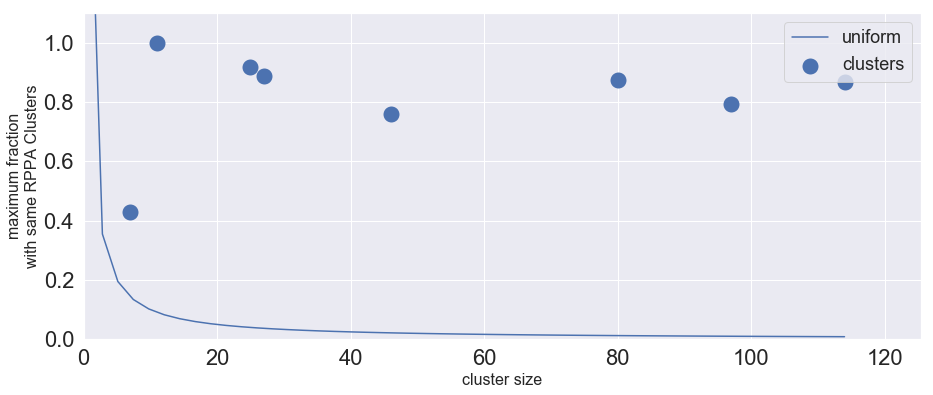

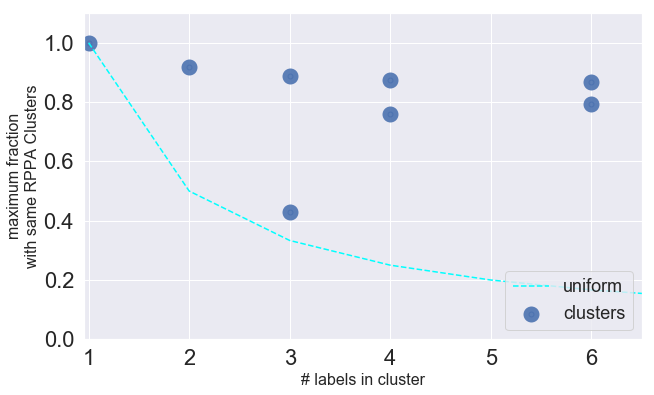

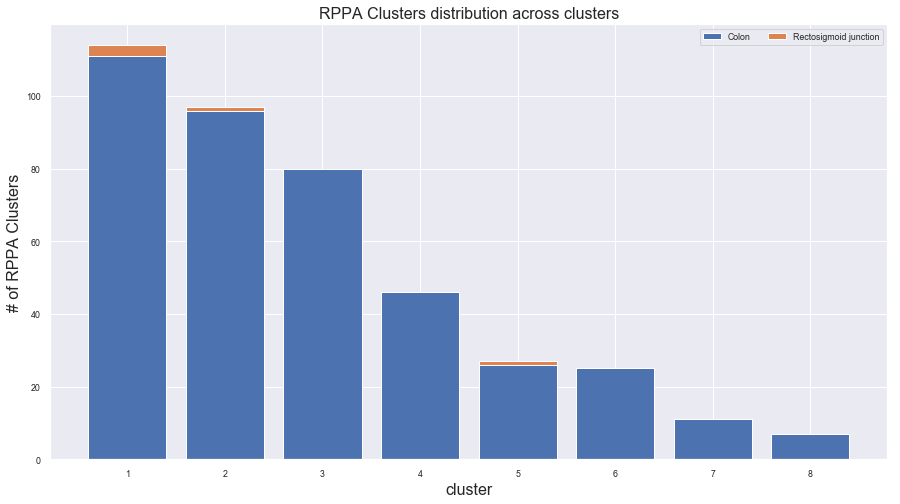

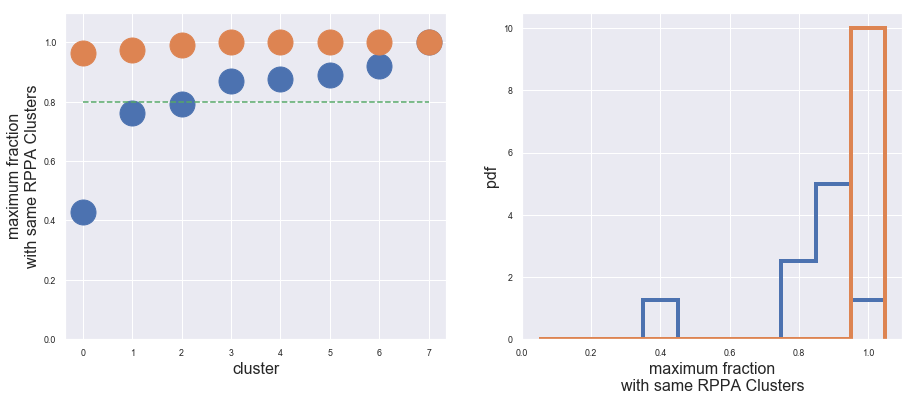

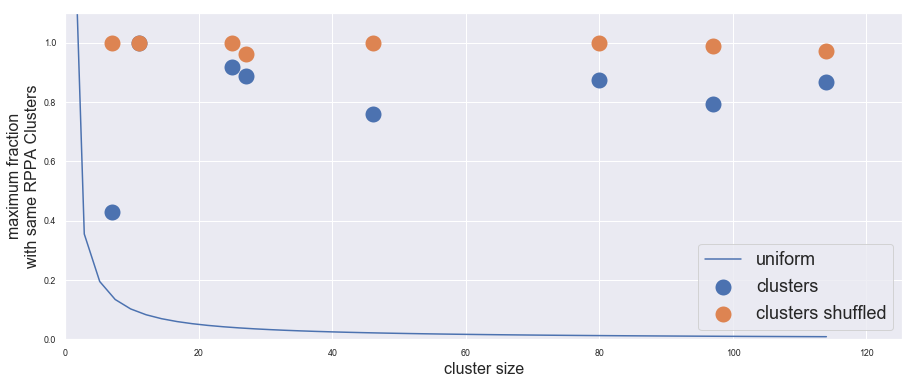

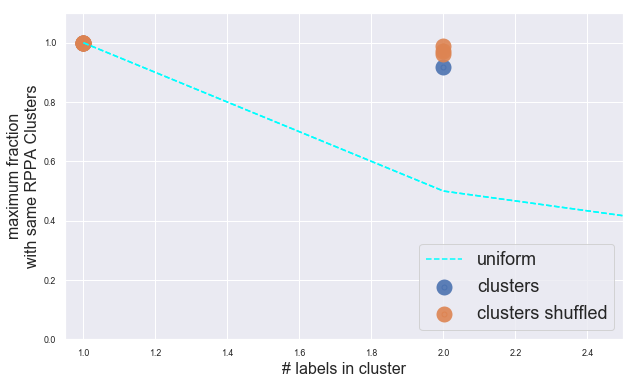

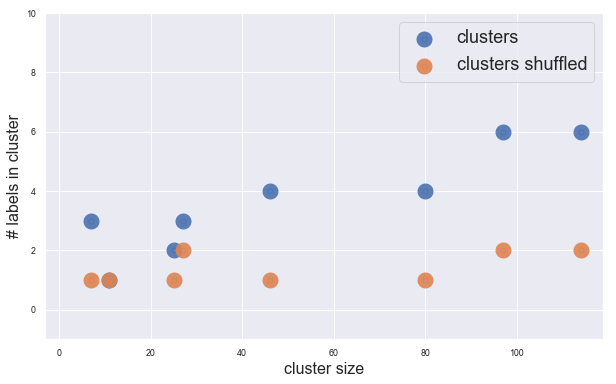

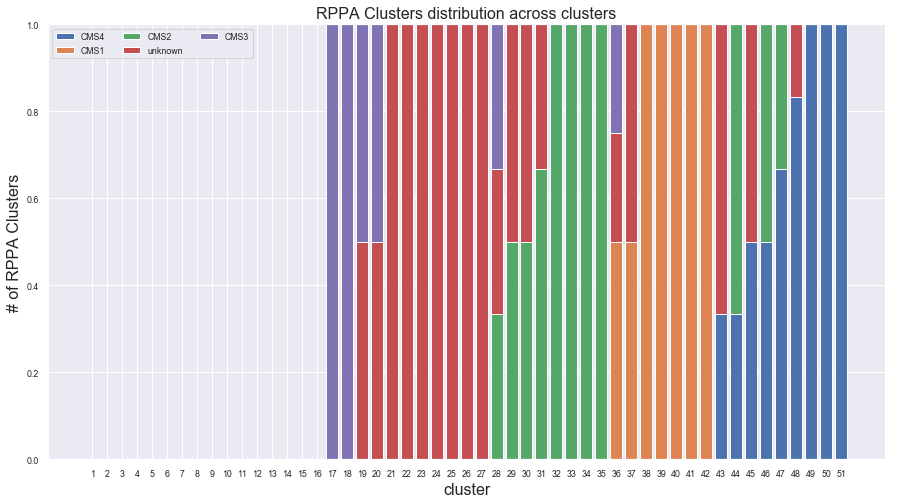

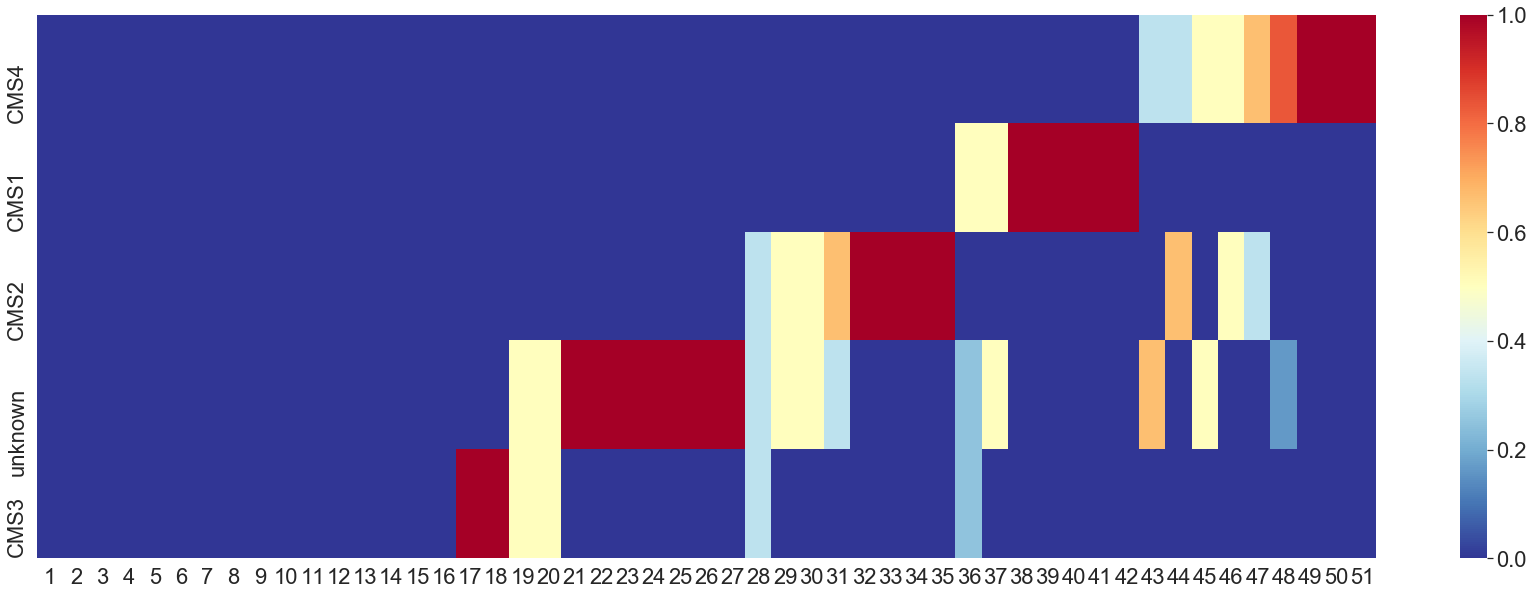

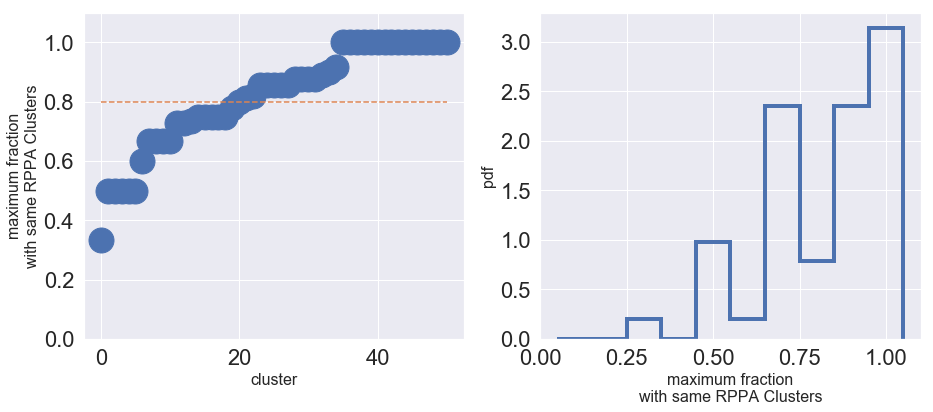

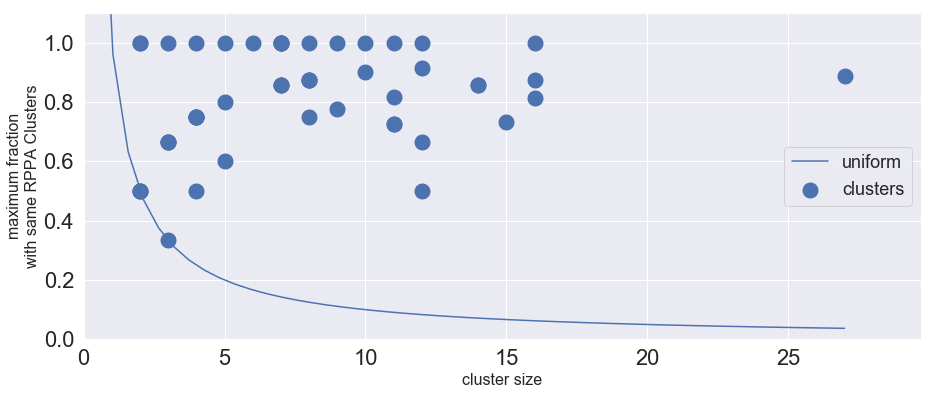

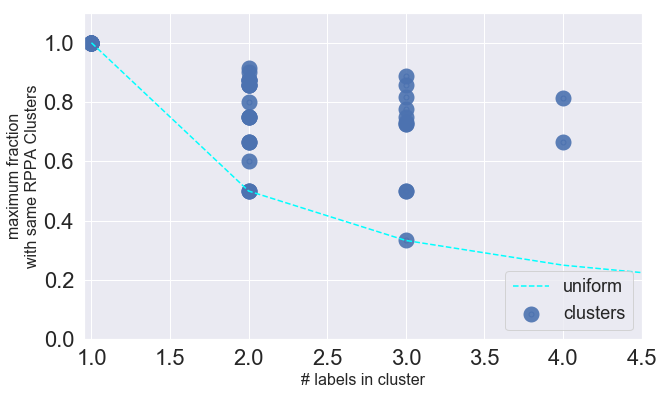

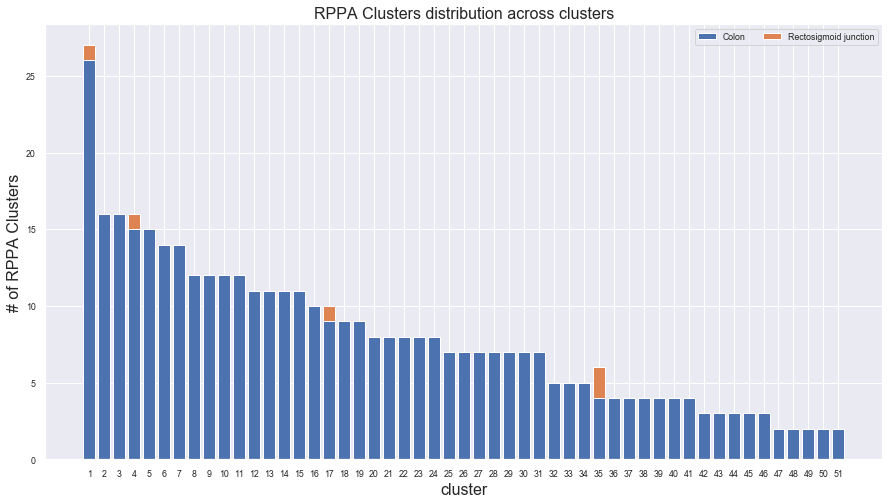

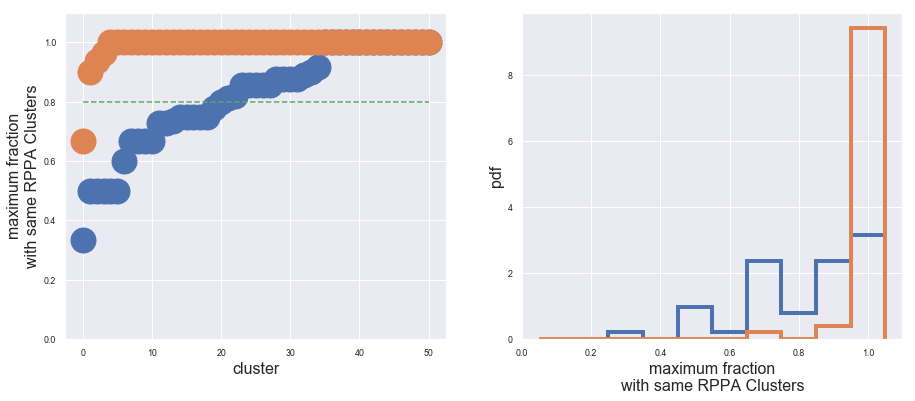

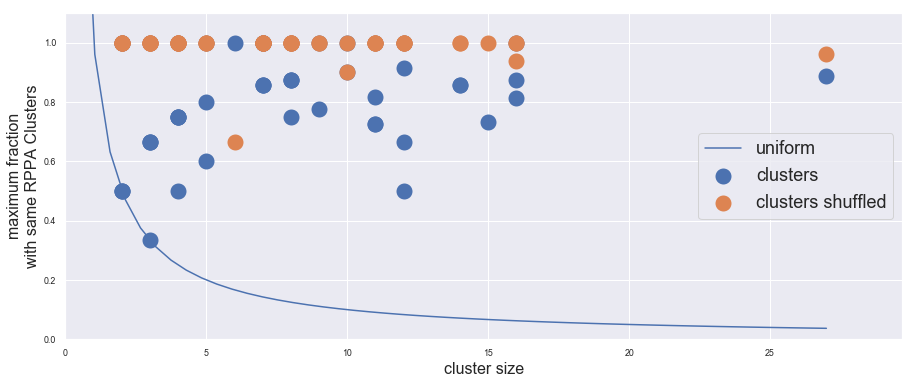

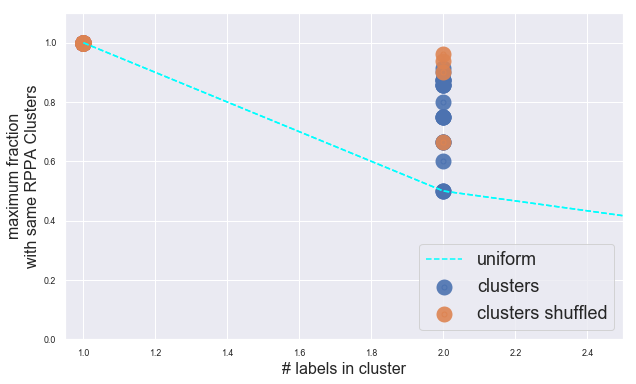

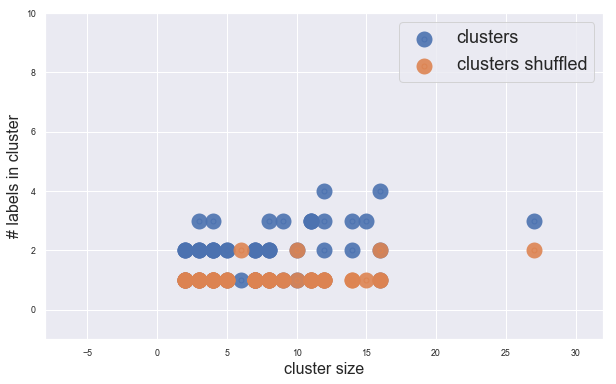

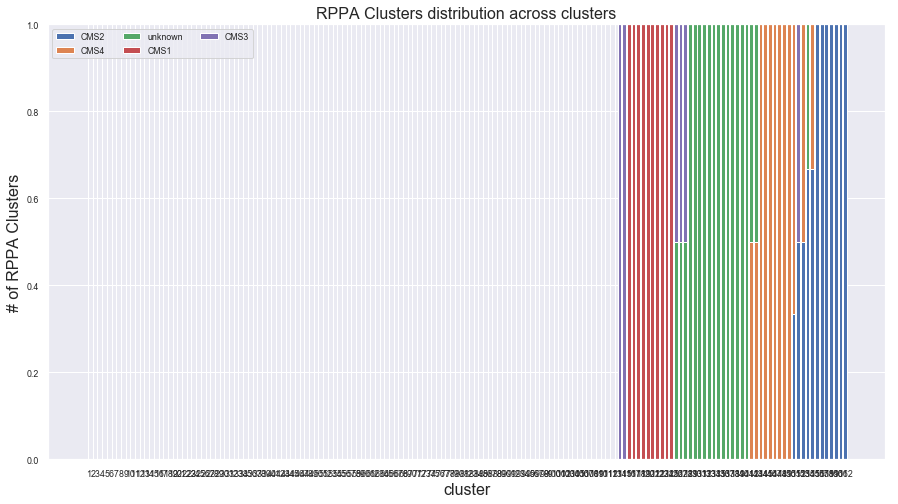

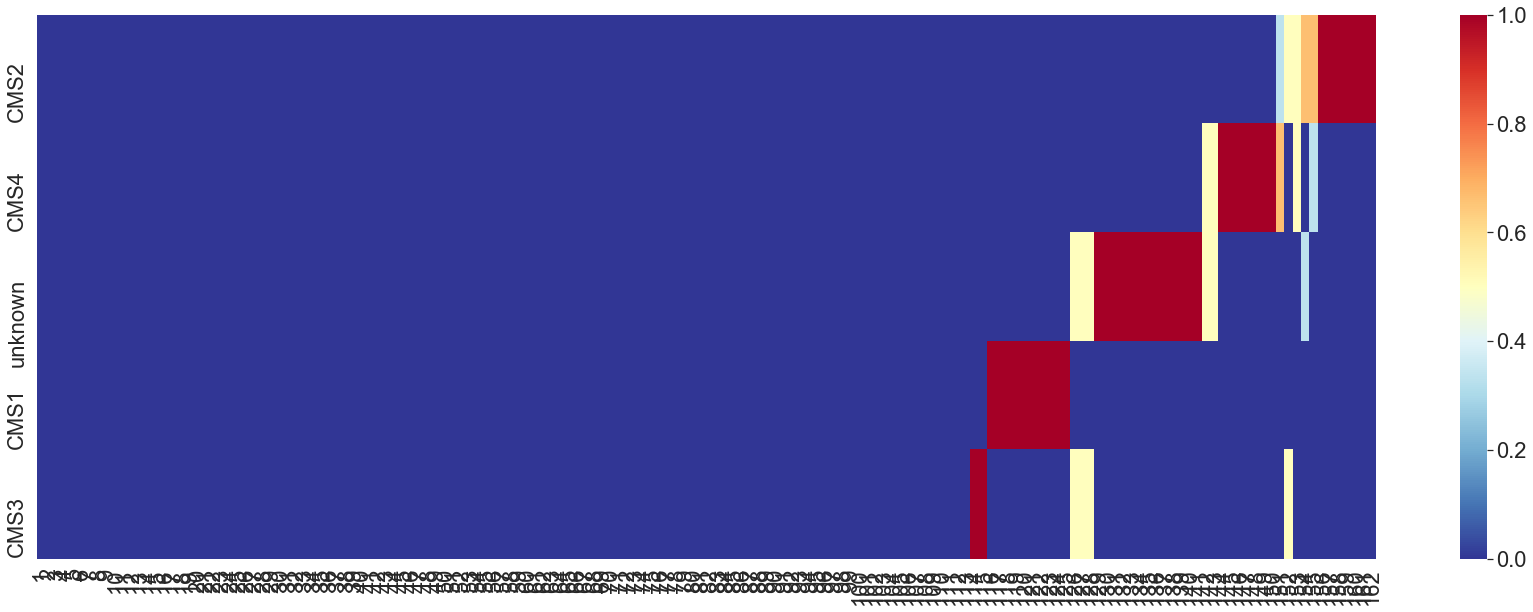

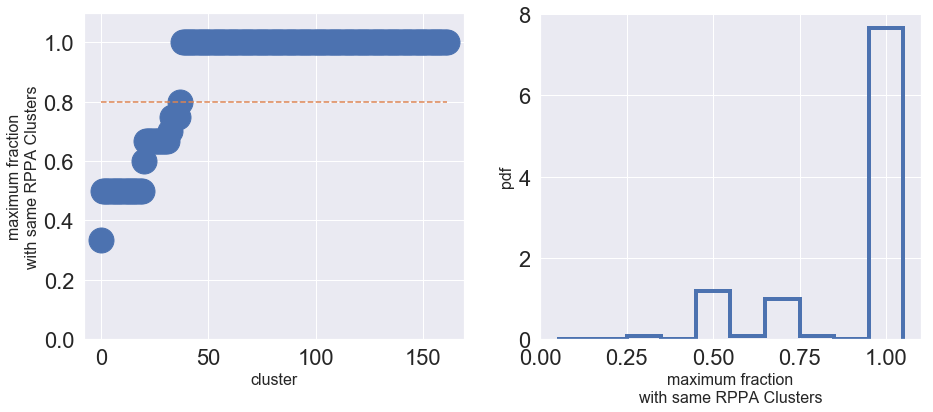

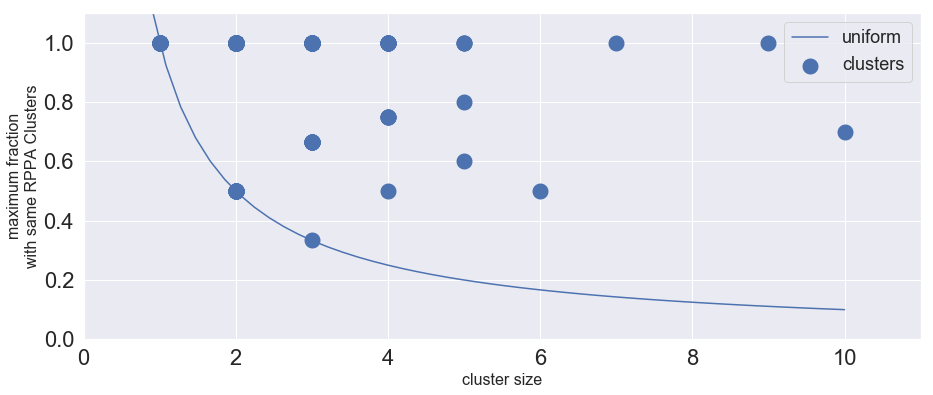

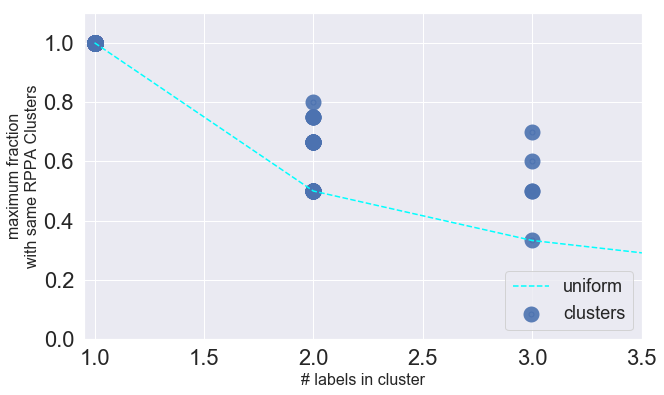

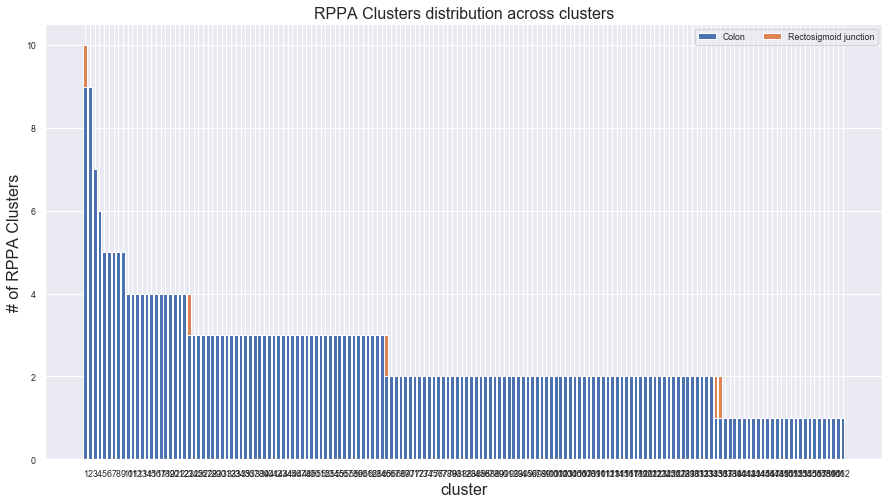

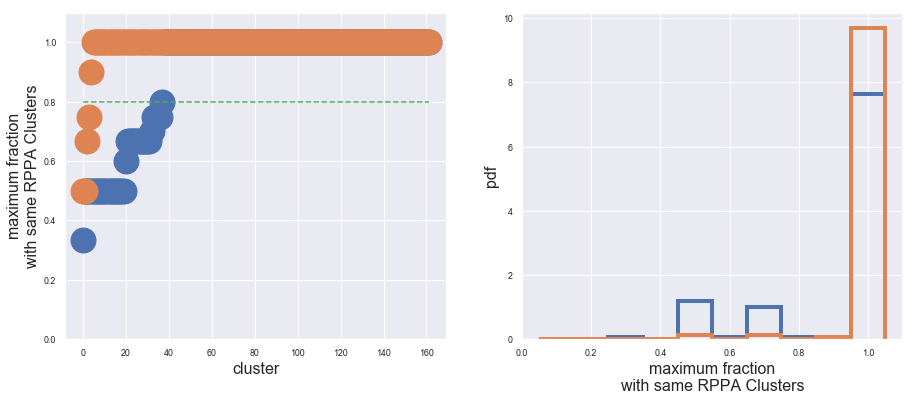

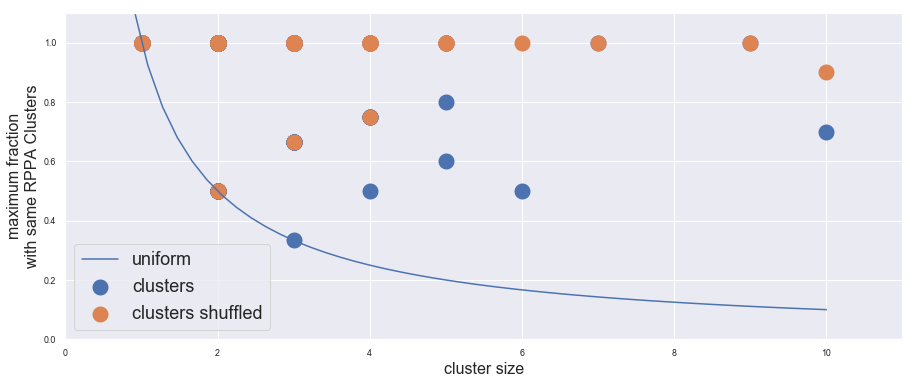

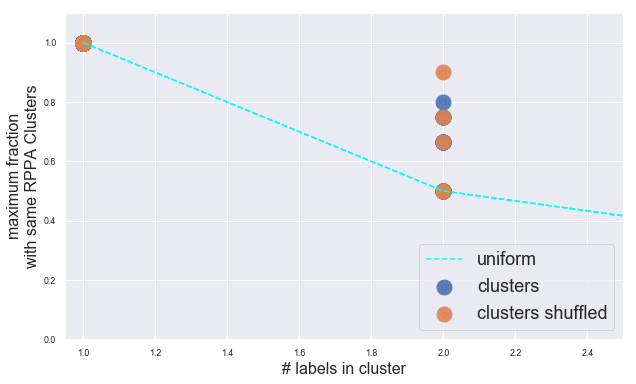

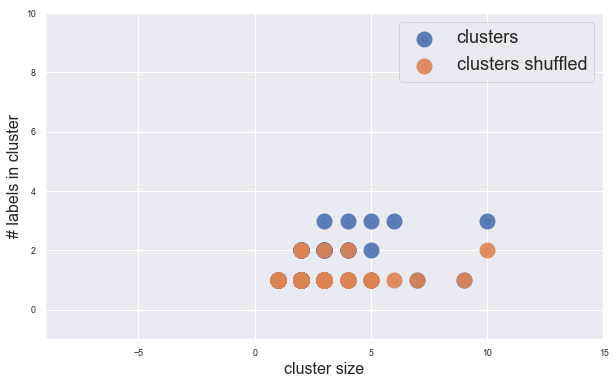

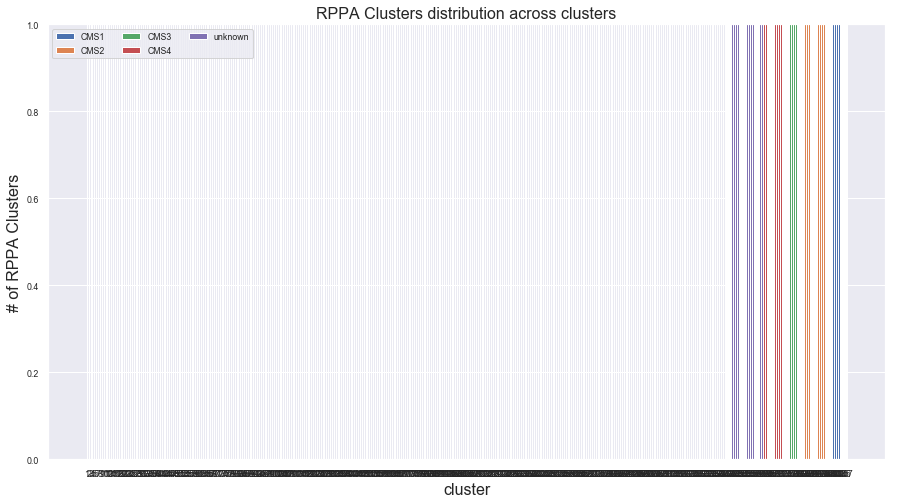

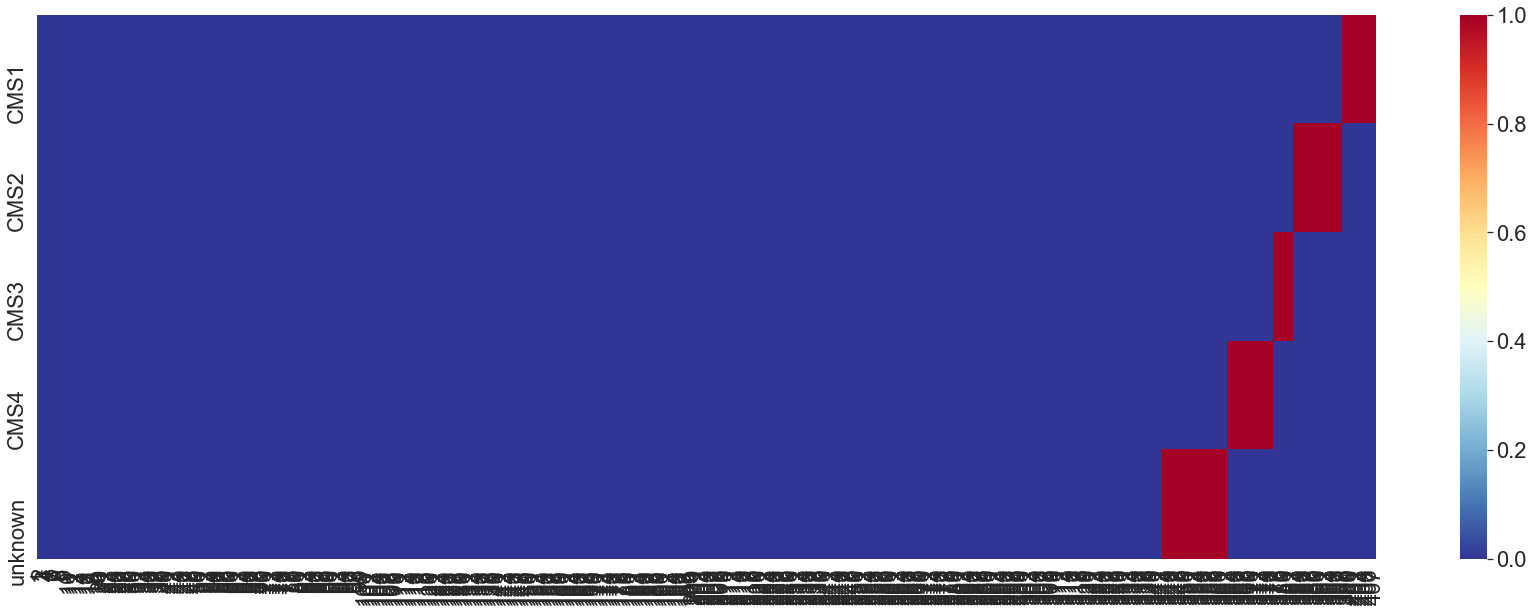

In [ ]:
for label in labels:
    for level in np.arange(L+1)[::-1]:
        normalise = False
        cluster = get_cluster_given_l(level, directory)
        fraction_sites = get_fraction_sites(cluster,df_files=df_files,label=label, normalise=normalise)
        
        fsdf = pd.DataFrame(data=fraction_sites)
        fsdf = fsdf.drop('Other', axis=1)
        fsdf = fsdf.divide(fsdf.sum(axis=1), axis=0).fillna(0)
        fraction_sites = fsdf.sort_values(by=fsdf.columns.to_list(), ascending=True).to_dict(orient='list')
        
        clustersinfo = get_clustersinfo(cluster,fraction_sites)
        plot_cluster_composition(fraction_sites,directory,level,label=label, normalise=normalise)
        make_heatmap(fraction_sites, directory, label, level, normalise=normalise)
        
        normalise = False
        cluster = get_cluster_given_l(level, directory)
        fraction_sites = get_fraction_sites(cluster,df_files=df_files,label=label, normalise=normalise)
        clustersinfo = get_clustersinfo(cluster,fraction_sites)            
        plot_maximum(clustersinfo,cluster,label,level, directory)
        plot_maximum_size(clustersinfo,label,level, directory)
        plot_maximum_label(clustersinfo,label,level, directory)
        fraction_sites_shuffle = get_fraction_sites(cluster, pd.read_csv("%s/files.dat.shuf"%directory, index_col=[0]), normalise=normalise)
        try:
            fraction_sites_shuffle = get_fraction_sites(cluster, pd.read_csv("%s/files.dat.shuf"%directory, index_col=[0]), normalise=normalise)
            clustersinfo_shuffle = get_clustersinfo(cluster, fraction_sites_shuffle)
            plot_cluster_composition(fraction_sites_shuffle,directory,level, normalise=False, label=label, shuffled=True)
            plot_maximum(clustersinfo,cluster,label,level,directory,clustersinfo_shuffle)
            plot_maximum_size(clustersinfo,label,level, directory,clustersinfo_shuffle)
            plot_maximum_label(clustersinfo,label,level, directory,clustersinfo_shuffle)
            plot_labels_size(clustersinfo,label,level, directory,clustersinfo_shuffle)
        except:
            print("must shuffle files")

In [207]:
scores = {}
for label in labels:
    scores[label]={
        'h':[],
        'c':[],
        'V':[]
    }
    for l in np.arange(L+1):
        print(l)
        true_labels, predicted_labels = define_labels(get_cluster_given_l(l, directory), df_files, label=label)
        scores[label]['h'].append(metrics.cluster.homogeneity_score(true_labels, predicted_labels))
        scores[label]['c'].append(metrics.cluster.completeness_score(true_labels, predicted_labels))
        scores[label]['V'].append(metrics.cluster.v_measure_score(true_labels, predicted_labels))

0
1


In [ ]:
scores['shuffle']={
        'h':[],
        'c':[],
        'V':[]
    }
for l in np.arange(1,L+1):
    print(l)
    _, predicted_labels = define_labels(get_cluster_given_l(l, directory), df_files, label='primary_site')
    true_labels, _ = define_labels(get_cluster_given_l(l,directory), pd.read_csv("%s/files.dat.shuf"%directory, index_col=[0]),label='primary_site')
    scores['shuffle']['h'].append(metrics.cluster.homogeneity_score(true_labels, predicted_labels))
    scores['shuffle']['c'].append(metrics.cluster.completeness_score(true_labels, predicted_labels))
    scores['shuffle']['V'].append(metrics.cluster.v_measure_score(true_labels, predicted_labels))

In [ ]:
scores['hierarchical']={'h': [0.9999999999999997,
   0.9944332047037256,
   0.9642105604410879,
   0.4116961952184678],
  'c': [0.08925049268913182,
   0.12613583938380396,
   0.22573696031830276,
   0.16648964926015783],
  'V': [0.16387505589975176,
   0.22387494576663095,
   0.3658278322759565,
   0.23709731325391545]}
scores['lda']={'h': [0.9999999999999997,
  0.9969891871685275,
  0.9872026855086575,
  0.9184599667078042],
 'c': [0.08925049268913182,
  0.116700530320663,
  0.18807432116559844,
  0.3164133490502569],
 'V': [0.16387505589975176,
  0.20894359540077767,
  0.315955257995372,
  0.470676611642876]}

In [215]:
def add_score_lines(ax, scores, labels, xl):
    colors = {
        'primary_site':'blue',
        'secondary_site':'red',
        'disease_type':'red',
        'shuffle': 'orange',
        'uniq':'purple',
        'hierarchical':'cyan',
        'lda':'violet',
        'RPPA Clusters':'red'
    }
    for label in labels:
        ax.plot(xl, scores[label]['h'], ls='-.', c=colors[label], alpha=0.2)
        ax.plot(xl, scores[label]['c'], ls=':', c=colors[label], alpha=0.2)
        ax.plot(xl, scores[label]['V'], label='MI - %s'%label, ls='-', c=colors[label])
    customize_metric_plot(ax,xl)
        
def customize_metric_plot(ax, xl):
    ax.set_xlabel("number of clusters", fontsize=16)
    ax.set_ylabel("score", fontsize=16)
    ax.set_ylim((0,1.1))
    ax.set_xlim(np.min(xl)-1,np.max(xl))
    ax.set_xscale('log')
    ax.legend(loc='best', fontsize=14)

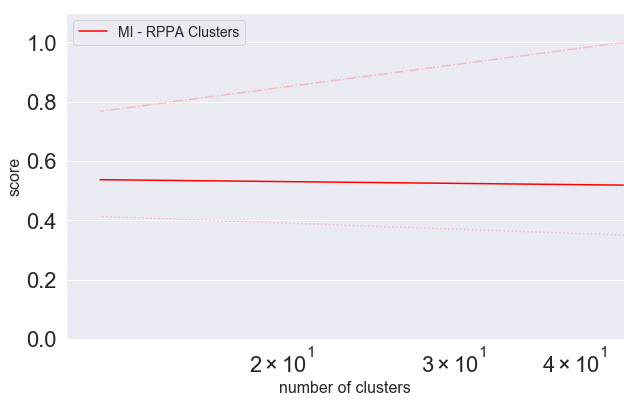

In [216]:
xl = [len(get_cluster_given_l(li,directory)) for li in np.linspace(0,L,L+1)]
fig=plt.figure(figsize=(10,6))
ax = fig.subplots(1)
add_score_lines(ax,scores,labels,xl)
#h = np.array(scores['primary_site']['h'])
#c = np.array(scores['secondary_site']['c'])
#ax.plot(xl, 2*h*c/(h+c), ls='-',c='g')
plt.show()
fig.savefig("%s/metric_scores.pdf"%(directory))

In [ ]:
fig=plt.figure(figsize=(10,6))
ax = fig.subplots(1)
add_score_lines(ax,scores,np.concatenate((labels,['shuffle'])),xl)
h = np.array(scores['primary_site']['h'])
c = np.array(scores['secondary_site']['c'])
ax.plot(xl, 2*h*c/(h+c), ls='-',c='g')
plt.show()
fig.savefig("%s/metric_scores_shuffle.pdf"%(directory))

In [ ]:
fig=plt.figure(figsize=(10,6))
ax = fig.subplots(1)
add_score_lines(ax,scores,np.concatenate((labels,['shuffle','hierarchical'])),xl)
h = np.array(scores['primary_site']['h'])
c = np.array(scores['secondary_site']['c'])
ax.plot(xl, 2*h*c/(h+c), ls='-',c='g')
plt.show()
fig.savefig("%s/metric_scores_hier.pdf"%(directory))

In [ ]:
fig=plt.figure(figsize=(10,6))
ax = fig.subplots(1)
add_score_lines(ax,scores,scores.keys(),xl)
h = np.array(scores['primary_site']['h'])
c = np.array(scores['secondary_site']['c'])
ax.plot(xl, 2*h*c/(h+c), ls='-',c='g')
plt.show()
fig.savefig("%s/metric_scores_all.pdf"%(directory))

# Benchmark
https://scikit-learn.org/stable/modules/clustering.html

In [ ]:
true_labels = []
predicted_labels = []
for c in cluster:
    print(c)
    for sample in cluster[c]:
        #true_labels.append(getFile(sample)['primary_site'].values[0])
        try:
            true_labels.append(df_files.loc[sample][label])
            predicted_labels.append(c)
        except:
            print("error in %s"%sample)

In [ ]:
_, labels_true = np.unique(true_labels,return_inverse=True)

In [ ]:
series_metrics=pd.Series(name=setup+'__level_%d_%s'%(level,label))
series_metrics['MI']=metrics.cluster.normalized_mutual_info_score(labels_true, predicted_labels, average_method='arithmetic')
series_metrics['Homogeneity']=metrics.cluster.homogeneity_score(labels_true, predicted_labels) 
series_metrics['Completness']=metrics.cluster.completeness_score(labels_true, predicted_labels) 
series_metrics['Vmeasure']=metrics.cluster.v_measure_score(labels_true, predicted_labels)
series_metrics['Fowlkes-Mallows']=metrics.cluster.fowlkes_mallows_score(labels_true,predicted_labels)
series_metrics['AdjustedRandIndex']=metrics.cluster.adjusted_rand_score(labels_true,predicted_labels)

In [ ]:
series_metrics

In [ ]:
#df_metrics = pd.DataFrame(columns=['AdjustedRandIndex','MI','Homogeneity','Completness','Vmeasure','Fowlkes-Mallows'])

In [ ]:
try:
    df_metrics.append(series_metrics, ignore_index=False, verify_integrity=True).to_csv("results/hSBM/metrics.csv", index=True,header=True)
except:
    raise

In [ ]:
df_metrics = pd.read_csv("results/hSBM/metrics.csv", index_col=[0],header=[0])
df_metrics.sort_values(by=['MI','Homogeneity'], ascending=False, axis=0, inplace=True)
df_metrics.round(decimals=2)

In [ ]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(24, 20)) # set size frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.set_frame_on(False)  # no visible frame, uncomment if size is ok
tabla = pd.plotting.table(ax, df_metrics.round(decimals=2), loc='upper right', colWidths=[0.12]*len(df_metrics.columns))  # where df is your data frame
tabla.auto_set_font_size(False) # Activate set fontsize manually
tabla.set_fontsize(12) # if ++fontsize is necessary ++colWidths
tabla.scale(1, 2) # change size table
plt.savefig('results/hSBM/metrics.pdf', transparent=True)

In [ ]:
metrics.cluster.contingency_matrix(true_labels, predicted_labels)

In [ ]:
df_files[df_files['primary_site']=='Brain']